<a href="https://colab.research.google.com/github/bigsteris/Namu-darbai/blob/main/3_Nam%C5%B3_darbas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from  sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, precision_recall_curve, classification_report
from sklearn import svm
from numpy.random import seed

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **RAND=22310 # should be your student code abcd**

In [3]:
RAND=2106 # should be your student code abcd
seed(RAND)

from https://drive.google.com/file/d/1-jrwZmZ3kqH-3JbckqbxEsr7EjW27IDJ/view?usp=sharing copy file archive.zip to your folder.

In [34]:
df = pd.read_csv('/content/drive/MyDrive/IVSP/2ND/adult.csv')

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


**About the Dataset**
```*Age: Describes the age of individuals. Continuous.
*Workclass*: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
*fnlwgt*: Continuous.
*education*: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
*education-num*: Number of years spent in education. Continuous.
*marital-status*: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
*occupation*: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
*relationship*: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
*race*: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
*sex*: Female, Male.
*capital-gain*: Continuous.
*capital-loss*: Continuous.
*hours-per-week*: Continuous.
*native-country*: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
*salary*: >50K,<=50K  ---- CLASSIFICATION Target

```



We can see that the columns workclass, occupation, and native.country contains null values. There can be many ways to impute missing values, but right now, for the sake of simplicity we would impute them using mode!



In [36]:
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

Data preparation for a model implementation

In [37]:
from sklearn.preprocessing import LabelEncoder
categorical = ['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country','income']
label_encoder = LabelEncoder()
for col in categorical:
    label_encoder.fit(df[col])
    df[col] = label_encoder.transform(df[col])

from sklearn.model_selection import train_test_split
X = df[['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country', 'age', 'hours.per.week']]
y = df['income']

feature_name = ['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country', 'age', 'hours.per.week']

#let's split data and do input feature transform.

In [38]:
X_tr, X_te, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RAND, shuffle=True, stratify=y)

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_tr)
X_train=scaler.transform(X_tr)
X_test=scaler.transform(X_te)

## Let's implement the baseline model. With THE BEST parameters from the assignment 2 and all features from a dataset.

**The task 1.**
Depending on the last digit of your student Internal code (abcde) take an "optimal" specific *parameter* from the assignment 2.
The RAND variable is your student ID numbers RAND="bcde" at a top of the code.

0. DecisionTreeClassifier(criterion='entropy', random_state=RAND, min_samples_split = `???`)
1. DecisionTreeClassifier(criterion='gini', random_state=RAND, max_depth = `???`)
2. KNeighborsClassifier(n_neighbors=`???`, p=2)
3. KNeighborsClassifier(n_neighbors='???', p=1)
4. svm. SVC(random_state=RAND, kernel='linear', C=`???`)
5. svm.SVC(random_state=RAND, kernel='rbf', gamma=0.07, C=`???`)
6. svm.SVC(random_state=RAND,kernel='poly', degree=3, C=`???`)
7. svm.LinearSVC(random_state=RAND,C=`???`)
8. MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(`???`,), random_state=RAND)
9. MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(`???`,5), random_state=RAND)

In [12]:
model = svm.SVC(random_state=RAND,kernel='poly', degree=3, C=59)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
scores_baseline=metrics.accuracy_score(y_test,y_pred)
print("Baseline accuracy = ", scores_baseline)

Baseline accuracy =  0.7695772341078924


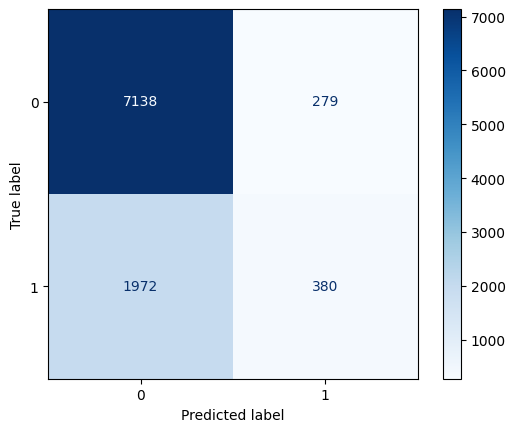

In [ ]:
# Plot Confusion matrix
classes = None
cm = confusion_matrix(y_test, y_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp = disp.plot(include_values=True, cmap='Blues', ax=None, xticks_rotation='horizontal')

In [ ]:
print("Baseline metrics:")
print("- Accuracy  = %.3f" % accuracy_score(y_test, y_pred))
print("- ROC AUC   = %.3f" % roc_auc_score(y_test, y_pred))
# compute the classification report
print(classification_report(y_test, y_pred))

Baseline metrics:
- Accuracy  = 0.770
- ROC AUC   = 0.562
              precision    recall  f1-score   support

           0       0.78      0.96      0.86      7417
           1       0.58      0.16      0.25      2352

    accuracy                           0.77      9769
   macro avg       0.68      0.56      0.56      9769
weighted avg       0.73      0.77      0.72      9769



-----------------------------------------------------------------------
**Now, let's build your model with feature selection.**
-----------------------------------------------------------------------

In [19]:
RAND=2106 ## Student ID abcde
!pip install boruta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 1.7 MB/s eta 0:00:00


#The task 2. features selection by chi2  or f_classif.

2.1 If your student number last digit >5 then to use "chi2", **else**  "f_classif" .


2.2 Find the best number of feature by changing k

In [40]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

#features selection by chi2  or f_classif
#if your student number last digit >5 then to use "chi2", else  f_classif
#Find the best number of feature by changing k

bestfeatures = SelectKBest(score_func=chi2, k=8)
#train
bestfeatures.fit(abs(X_train), y_train)

print(bestfeatures.get_support())
#Apply feature selection and return transformed data
X_train_filtered = bestfeatures.transform(X_train)
X_test_filtered = bestfeatures.transform(X_test)
#check your model accuracy with reduced number of features
model.fit(X_train_filtered, y_train)
y_pred = model.predict(X_test_filtered)

score_filtered=metrics.accuracy_score(y_test,y_pred)

print("Accuracy_K_Best = ", score_filtered)

[ True  True  True  True  True  True  True False  True False]
Accuracy_K_Best =  0.7592384072064694


#The task 3. features selection by SequentialFeatureSelector.

3.1 If your student number last digit >5 then to use "backward", else "forward" .

3.2 Find the best number of feature by changing n_features_to_select

In [41]:
from sklearn.feature_selection import SequentialFeatureSelector

sfs = SequentialFeatureSelector(GaussianNB(), direction='backward', n_features_to_select=9)
#train
sfs.fit(X_train, y_train)
#print selected features
print(sfs.get_support())

#Apply feature selection and return transformed data
X_train_filtered = sfs.transform(X_train)
X_test_filtered = sfs.transform(X_test)
#train your model
model.fit(X_train_filtered, y_train)
y_pred = model.predict(X_test_filtered)
score_filtered_sfs=metrics.accuracy_score(y_test,y_pred)
print("Accuracy_sfs = ", score_filtered_sfs)

[ True  True  True  True  True  True False  True  True  True]
Accuracy_sfs =  0.7650731907052922


#Task 4. Feature selection by Boruta wraper.
4.1 If your student number last digit >5 then to use "rfc", else "etc" .




In [20]:
#Install Boruta for first time
#!pip install boruta
from boruta import BorutaPy

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=RAND)
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(random_state=RAND)

# define Boruta feature selection method by ensamble classifier:  rfc, etc
feat_selector = BorutaPy(rfc, n_estimators='auto', verbose=1, random_state=RAND, max_iter=10) #, max_iter=10

# find all relevant features
feat_selector.fit(X_train, y_train)


# check selected features
print(feat_selector.support_)  #Should we accept the feature

# check ranking of features
print(feat_selector.ranking_) #Rank 1 is the best

Iteration: 1 / 10
Iteration: 2 / 10
Iteration: 3 / 10
Iteration: 4 / 10
Iteration: 5 / 10
Iteration: 6 / 10
Iteration: 7 / 10
Iteration: 8 / 10
Iteration: 9 / 10


BorutaPy finished running.

Iteration: 	10 / 10
Confirmed: 	3
Tentative: 	2
Rejected: 	4
[False  True False False  True False False False  True False]
[4 1 2 3 1 7 5 6 1 2]


In [21]:
"""
Review the features
"""
# zip feature names, ranks, and decisions
feature_ranks = list(zip(feature_name,
                         feat_selector.ranking_,
                         feat_selector.support_))

# print the results
new_names=[]
for feat in feature_ranks:
    print('Feature: {:<30} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))
    if feat[2]:
     new_names.append(feat[0])

Feature: workclass                      Rank: 4,  Keep: False
Feature: education                      Rank: 1,  Keep: True
Feature: marital.status                 Rank: 2,  Keep: False
Feature: occupation                     Rank: 3,  Keep: False
Feature: relationship                   Rank: 1,  Keep: True
Feature: race                           Rank: 7,  Keep: False
Feature: sex                            Rank: 5,  Keep: False
Feature: native.country                 Rank: 6,  Keep: False
Feature: age                            Rank: 1,  Keep: True
Feature: hours.per.week                 Rank: 2,  Keep: False


In [22]:
# what features ar most important for a classification task?
new_names

['education', 'relationship', 'age']

In [23]:
#Apply feature selection and return transformed data
X_train_filtered = feat_selector.transform(X_train)
X_test_filtered = feat_selector.transform(X_test)

In [25]:
#train model
model.fit(X_train_filtered, y_train)
y_pred = model.predict(X_test_filtered)
score_filtered_B=metrics.accuracy_score(y_test,y_pred)
print("Boruta accuracy = ", score_filtered_B)

Boruta accuracy =  0.6446666666666667


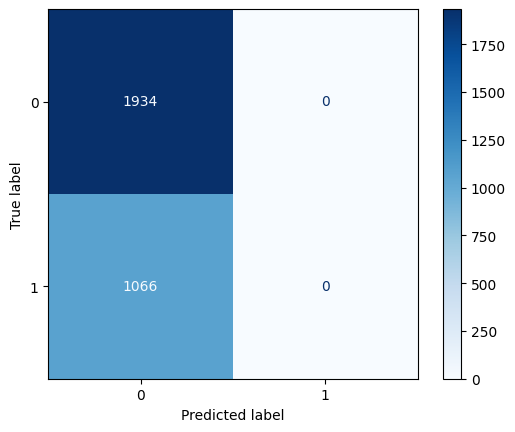

In [26]:
#plot confusion matrixes of a classifier with Boruta selected features
classes = None
cm = confusion_matrix(y_test, y_pred, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp = disp.plot(include_values=True, cmap='Blues', ax=None, xticks_rotation='horizontal')

In [27]:
print("Boruta accuracy metrics:")
print("- Accuracy  = %.3f" % accuracy_score(y_test, y_pred))
print("- ROC AUC   = %.3f" % roc_auc_score(y_test, y_pred))
# compute the classification report
print(classification_report(y_test, y_pred))

Boruta accuracy metrics:
- Accuracy  = 0.645
- ROC AUC   = 0.500
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1934
           1       0.00      0.00      0.00      1066

    accuracy                           0.64      3000
   macro avg       0.32      0.50      0.39      3000
weighted avg       0.42      0.64      0.51      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Task 5. Compare Base line classifier accuracy to classifiers with reduced features and make an conclusion of improvement. What features were most oftten selected?

In [46]:
print("Baseline accuracy:                                   ", scores_baseline)
print("\nf_classif feature selection accuracy:                ", score_filtered)
print("The score improved by:                               ", round(score_filtered-scores_baseline,16))
print("\nSequentialFeatureSelector feature selection accuracy:", score_filtered_sfs)
print("The score improved by:                               ", round(score_filtered_sfs-scores_baseline,16))
print("\nBoruta wraper feature selection accuracy:            ", score_filtered_B)
print("The score improved by:                               ", round(score_filtered_B-scores_baseline,16))

features_number = 10
count=[0]*features_number
arr1=bestfeatures.get_support()
arr2=sfs.get_support()
arr3=feat_selector.support_
for x in range(features_number):
  if arr1[x] == True:
    count[x]=count[x]+1
  if arr2[x] == True:
    count[x]=count[x]+1
  if arr3[x] == True:
    count[x]=count[x]+1
maxElement = np.amax(count)
result = np.where(count == np.amax(count))
print("\nMost often selected features:")
for x in range(len(result[0])):
  print(feature_name[result[0][x]])


Baseline accuracy:                                    0.7695772341078924

f_classif feature selection accuracy:                 0.7592384072064694
The score improved by:                                -0.010338826901423

SequentialFeatureSelector feature selection accuracy: 0.7650731907052922
The score improved by:                                -0.0045040434026001

Boruta wraper feature selection accuracy:             0.6446666666666667
The score improved by:                                -0.1249105674412256

Most often selected features:
education
relationship
age


All classifiers with reduced features made the performance worse

**Bonus**: train a decision tree on reduced features. From the decision tree graph Explain - what you need "to do" in order to get into class ">50K".